In [ ]:
# Zhen - Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# Zhen - Load TTC subway delay data and weather data
ttc_delays_path = 'ttc-subway-delay-data-2023.csv'
delay_codes_path = 'ttc-subway-delay-codes.csv'

In [ ]:
ttc_delays = pd.read_csv(ttc_delays_path)
delay_codes = pd.read_csv(delay_codes_path)


In [ ]:
# Clean column names in the delay_codes dataset
delay_codes.columns = delay_codes.columns.str.strip()  # Remove leading/trailing whitespace
delay_codes.columns = delay_codes.columns.str.upper()  # Standardize to uppercase for consistency

# Clean and rename relevant columns in delay codes
delay_codes_cleaned = delay_codes[['SUB RMENU CODE', 'CODE DESCRIPTION']].rename(
    columns={'SUB RMENU CODE': 'CODE', 'CODE DESCRIPTION': 'DESCRIPTION'}
).drop_duplicates()

# Check for missing or duplicate values in the TTC delays dataset
print("Missing values in TTC delays dataset:")
print(ttc_delays.isnull().sum())

# Remove duplicate rows from TTC delays dataset
ttc_delays_cleaned = ttc_delays.drop_duplicates()

print(delay_codes_cleaned.head())
print(ttc_delays_cleaned.head())


Missing values in TTC delays dataset:
Date            0
Time            0
Day             0
Station         0
Code            0
Min Delay       0
Min Gap         0
Bound        8526
Line           48
Vehicle         0
dtype: int64
    CODE          DESCRIPTION
0   EUAC     Air Conditioning
1   EUAL  Alternating Current
2  EUATC   ATC RC&S Equipment
3   EUBK               Brakes
4   EUBO                 Body
         Date  Time     Day           Station   Code  Min Delay  Min Gap  \
0  2023-01-01  2:22  Sunday    MUSEUM STATION  MUPAA          3        9   
1  2023-01-01  2:30  Sunday   KIPLING STATION   MUIS          0        0   
2  2023-01-01  2:33  Sunday    WARDEN STATION    SUO          0        0   
3  2023-01-01  3:17  Sunday     KEELE STATION   MUIS          0        0   
4  2023-01-01  7:16  Sunday  BATHURST STATION   MUIS          0        0   

  Bound Line  Vehicle  
0     S   YU     5931  
1     E   BD     5341  
2     W   BD        0  
3   NaN   BD        0  
4   NaN   BD

In [ ]:
ttc_merged = ttc_delays.merge(
    delay_codes_cleaned, how='left', left_on='Code', right_on='CODE'
).drop(columns=['CODE'])

In [ ]:
# Extract hour from the 'Time' column for time-of-day analysis
ttc_merged['Hour'] = pd.to_datetime(ttc_merged['Time'], errors='coerce').dt.hour

<ipython-input-66-0d5e4fa0b19f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ttc_merged['Hour'] = pd.to_datetime(ttc_merged['Time'], errors='coerce').dt.hour


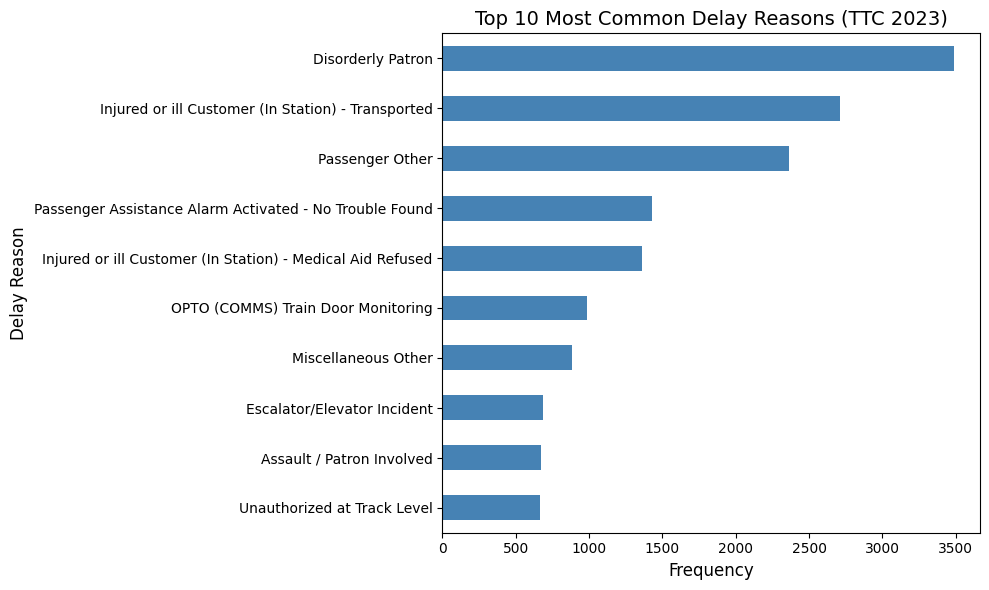

In [ ]:
# Count and visualize the most common delay reasons
top_delay_reasons = (
    ttc_merged['DESCRIPTION']
    .value_counts()
    .head(10)
    .sort_values(ascending=True)  # Sort for better visualization
)

# Plot the top 10 delay reasons
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_delay_reasons.plot(kind='barh', color='steelblue')
plt.title('Top 10 Most Common Delay Reasons (TTC 2023)', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Delay Reason', fontsize=12)
plt.tight_layout()
plt.show()

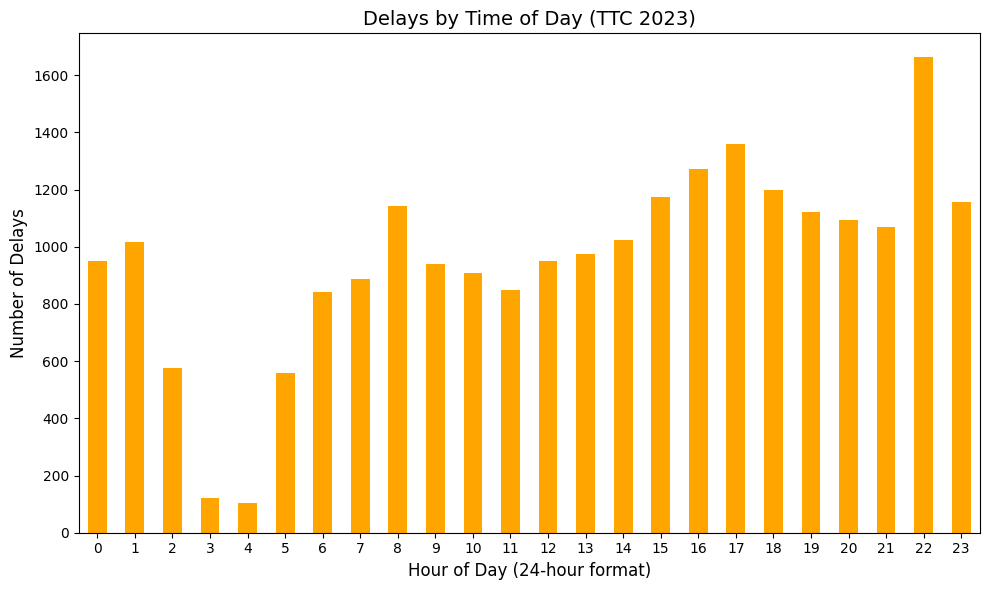

In [ ]:
# Bar Chart: Delays by Time of Day
time_of_day_delays = ttc_merged.groupby('Hour').size()
plt.figure(figsize=(10, 6))
time_of_day_delays.plot(kind='bar', color='orange')
plt.title('Delays by Time of Day (TTC 2023)', fontsize=14)
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Delays', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

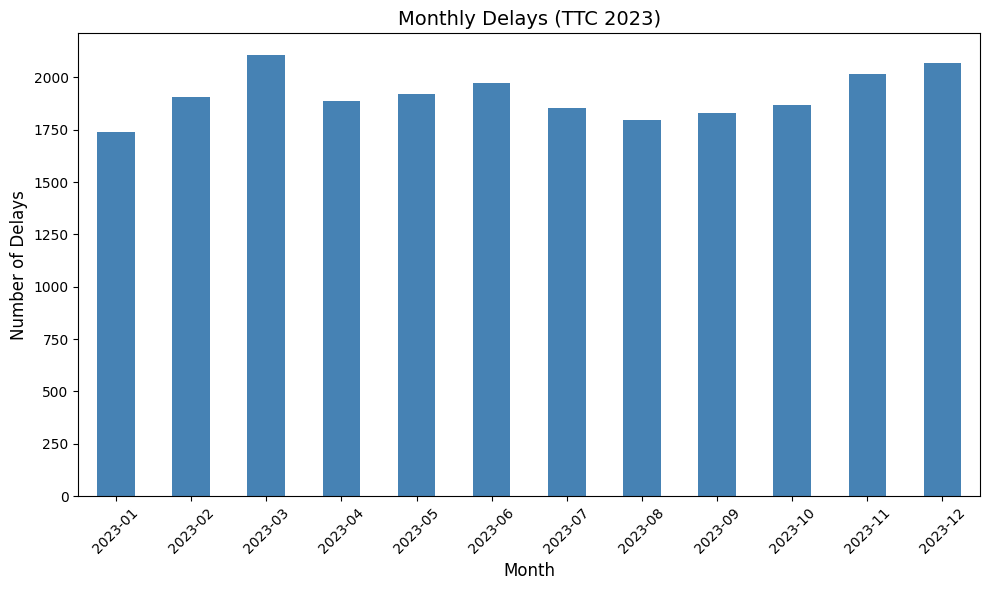

In [ ]:
# Bar Chart delays by month
ttc_merged['Date'] = pd.to_datetime(ttc_merged['Date'], errors='coerce')

monthly_delays = ttc_merged.groupby(ttc_merged['Date'].dt.to_period('M')).size()

plt.figure(figsize=(10, 6))
monthly_delays.plot(kind='bar', color='steelblue')
plt.title('Monthly Delays (TTC 2023)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Delays', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
